In [31]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical


In [60]:
# from keras.datasets import boston_housing
# (train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.data.shape

(506, 13)

In [14]:
(train_data, train_targets), (test_data, test_targets) = (boston.data[:406], boston.target[:406]), (boston.data[406:], boston.target[406:])

In [15]:
train_data.shape

(406, 13)

In [16]:
test_data.shape

(100, 13)

In [17]:
train_targets

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [18]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [19]:
test_data -= mean
test_data /= std

In [20]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=train_data.shape[1]))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [21]:
k= 4
num_val_samples = len(train_data) // k 
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    # prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    # build the Keras model (already compiled)
    model = build_model()
    # train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              nb_epoch=100, batch_size=1, verbose=0)
    # evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

('processing fold #', 0)
('processing fold #', 1)
('processing fold #', 2)
('processing fold #', 3)


In [22]:
all_scores

[2.5259972515672739,
 4.5694884286068458,
 3.2700295353880025,
 5.1914312343786255]

In [23]:
np.mean(all_scores)

3.8892366124851874

In [24]:
mean

array([  1.70635263e-16,  -3.22128750e-16,   3.92898631e-15,
         4.09907466e-16,  -7.46748038e-15,  -4.35147266e-15,
        -4.32604144e-16,   7.17543157e-16,   4.98779999e-16,
         9.62557893e-17,   1.87370644e-14,   1.94214513e-14,
         2.89861184e-17])

In [25]:
model.fit(train_data, train_targets,
          nb_epoch=300, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

 32/100 [========>.....................] - ETA: 0s

In [46]:
test_mae_score

7.8187971687316891

In [47]:
test_pred = model.predict(test_data)

In [48]:
test_pred.flatten()

array([ 18.19358253,  33.40104294,  15.29890251,  27.11378479,
        52.51002502,  26.49745941,   3.35442019,  29.79256821,
         5.95371485,  15.08177757,  20.40262032,  15.42615318,
        47.25654602,  24.53903198,  23.308815  ,  24.0603466 ,
        32.97082901,  21.4881916 ,  28.81663895,  18.10401154,
        33.31055832,  39.16770935,  21.66974068,  18.53473473,
        28.62469482,  27.89330482,  36.02587128,  25.81567574,
        27.32010651,  18.76885796,  25.77739143,  14.56806755,
         7.42411089,   9.76146698,   8.19805908,  11.14425468,
        13.5506897 ,  11.15146637,  15.30306244,  19.96109581,
        19.81254768,  13.42931175,  11.6940136 ,  18.6718235 ,
        28.43773651,  18.62604332,  16.07244682,  15.19620132,
        26.4989624 ,  25.21523094,  21.684412  ,  25.24415588,
        25.25850487,  16.6977787 ,  26.19696426,  18.16555977,
        17.46457863,  22.43616676,  23.22724533,  28.42334175,
        24.98973274,  21.03820038,  22.03444481,  25.61

In [49]:
test_targets

array([ 11.9,  27.9,  17.2,  27.5,  15. ,  17.2,  17.9,  16.3,   7. ,
         7.2,   7.5,  10.4,   8.8,   8.4,  16.7,  14.2,  20.8,  13.4,
        11.7,   8.3,  10.2,  10.9,  11. ,   9.5,  14.5,  14.1,  16.1,
        14.3,  11.7,  13.4,   9.6,   8.7,   8.4,  12.8,  10.5,  17.1,
        18.4,  15.4,  10.8,  11.8,  14.9,  12.6,  14.1,  13. ,  13.4,
        15.2,  16.1,  17.8,  14.9,  14.1,  12.7,  13.5,  14.9,  20. ,
        16.4,  17.7,  19.5,  20.2,  21.4,  19.9,  19. ,  19.1,  19.1,
        20.1,  19.9,  19.6,  23.2,  29.8,  13.8,  13.3,  16.7,  12. ,
        14.6,  21.4,  23. ,  23.7,  25. ,  21.8,  20.6,  21.2,  19.1,
        20.6,  15.2,   7. ,   8.1,  13.6,  20.1,  21.8,  24.5,  23.1,
        19.7,  18.3,  21.2,  17.5,  16.8,  22.4,  20.6,  23.9,  22. ,  11.9])

In [50]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

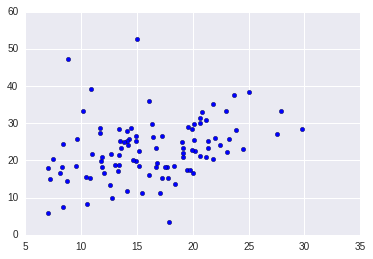

In [93]:
plt.scatter(test_targets, test_pred.flatten())
plt.show()

## Boston Housing data setについて
ボストンの家の価格データをsklearnを使って解析した例を見つけたので、それに沿って線形解析とNuralnetの結果を比較してみます。

- http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/


In [32]:
import pandas as pd
import seaborn


In [68]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [69]:
bos.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [70]:
bos.columns = boston.feature_names
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [71]:
boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [72]:
bos['PRICE'] = boston.target

In [73]:
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [74]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

In [75]:
lm = LinearRegression()

In [76]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
print 'Estimated intercept coefficient: ', lm.intercept_

Estimated intercept coefficient:  36.4911032804


In [78]:
print 'Number of coefficients:', len(lm.coef_)

Number of coefficients: 13


In [79]:
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estiatedCoefficients'])

features  estiatedCoefficients
0      CRIM             -0.107171
1        ZN              0.046395
2     INDUS              0.020860
3      CHAS              2.688561
4       NOX            -17.795759
5        RM              3.804752
6       AGE              0.000751
7       DIS             -1.475759
8       RAD              0.305655
9       TAX             -0.012329
10  PTRATIO             -0.953464
11        B              0.009393
12    LSTAT             -0.525467

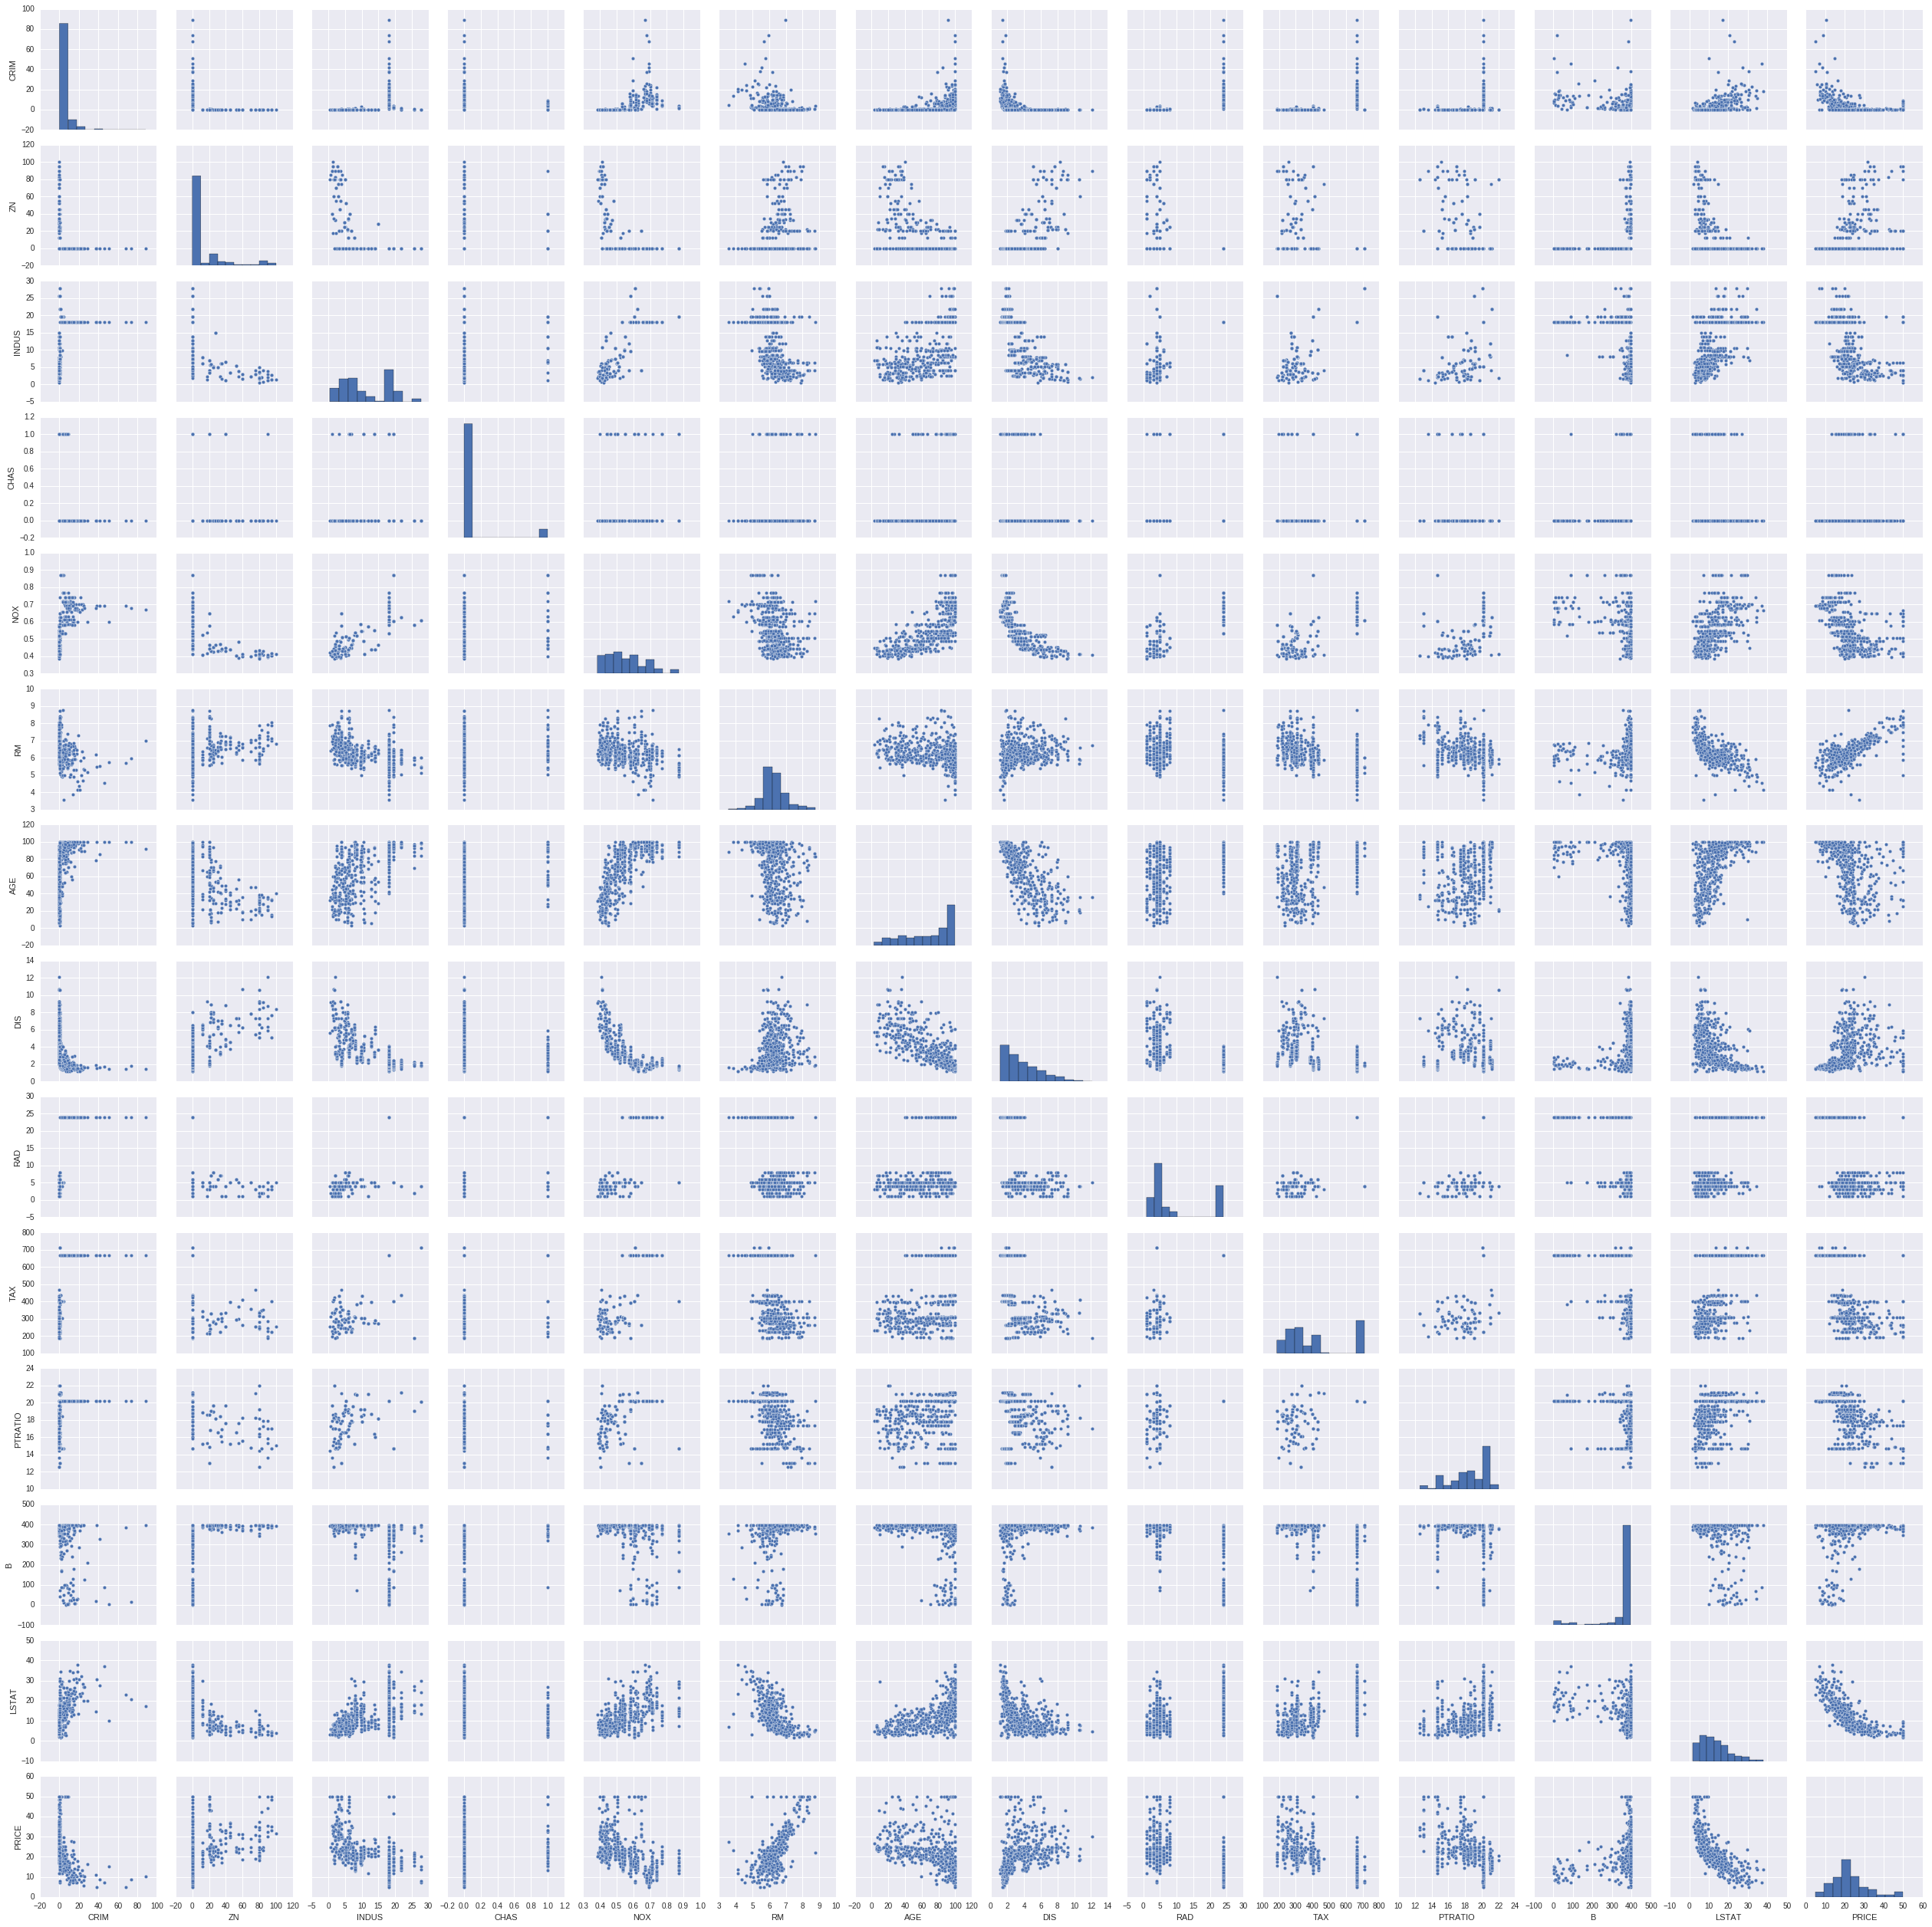

In [97]:
seaborn.pairplot(bos)
plt.show()

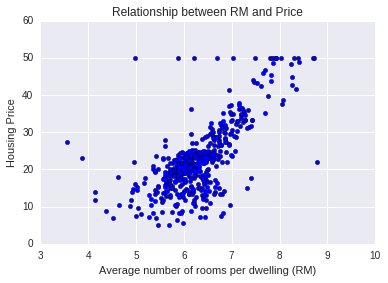

In [80]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and Price')
plt.show()

In [81]:
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

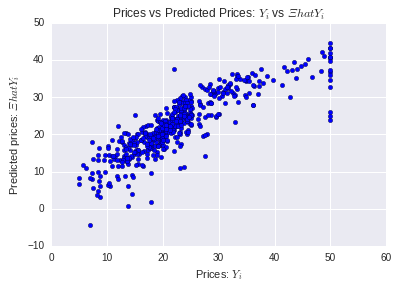

In [82]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $¥hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $¥hat{Y}_i$")
plt.show()

In [85]:
mseFull = np.mean((bos.PRICE - lm.predict(X))**2)
print mseFull

21.8977792177
